# Figure S10. Robustness of the findings to the effect of heterogeneity maps

In [1]:
import set_env  # not included in the repo, defines $PROJECT_DIR, $PNC_PROJECT_DIR, $IMAGEN_PROJECT_DIR & $INPUT_DIR

In [2]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

OUTPUT_DIR = {
    "pnc": os.path.join(os.environ["PNC_PROJECT_DIR"], "output"),
    "imagen": os.path.join(os.environ["IMAGEN_PROJECT_DIR"], "output"),
    "micamics": os.path.join(os.environ["PROJECT_DIR"], "output", "micamics")
}
INPUT_DIR = os.environ["INPUT_DIR"]
CODE_DIR = os.path.join(os.getcwd(), "..", "scripts")
sys.path.append(CODE_DIR)
from utils import transform, plot

import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 16, "font.family": "Asana Math", "figure.dpi": 300})
thcolor = '#44546A'
add_text = True # add statistics as text to some figures

/data/project/ei_development/env/lib/python3.10/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Load data:

In [3]:
all_stats = {}
all_ICCs_by_age = {}
all_data = {}
all_I_E = {}
for alt in ['main', '2maps', 'nmda_gabaa', '4maps']:
    all_stats[alt] = pd.read_csv(f"p_pnc200_{alt}_IE_age_stats.csv", index_col=0)
    all_data[alt] = pd.read_csv(f"pnc200_{alt}_data.csv", index_col=0)
    all_I_E[alt] = pd.read_csv(f"pnc200_{alt}_IE.csv", index_col=0)
    if alt != 'main':
        all_ICCs_by_age[alt] = pd.read_csv(f"p_pnc200_{alt}_IE_icc.csv", index_col=0)

## A. Effect of age on E-I ratio using T1w/T2w & FC G1 maps

### (i) FDR-significant effects

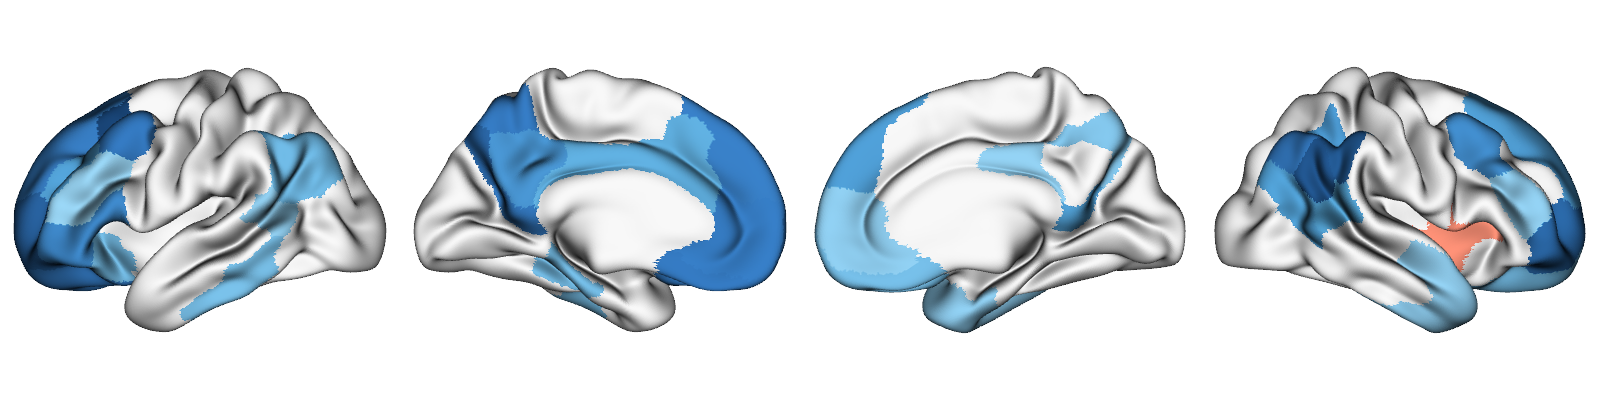

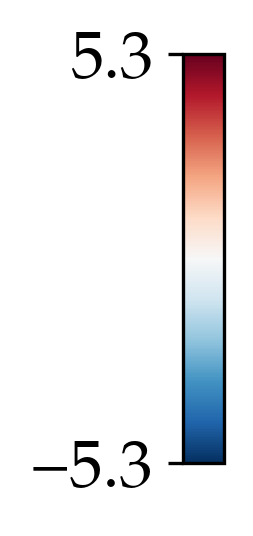

In [4]:
vmin = min(all_stats['2maps']['t'].values.min(), -all_stats['2maps']['t'].values.max()).round(2)
vmax = -vmin
plot.plot_surface(
    transform.deparcellate_surf(
        all_stats['2maps']['t'][all_stats['2maps']['p_fdr']<0.05], 
        'schaefer-100', concat=True, space='fsaverage'
    ), 
    'fsaverage', mesh_kind='semi-inflated',
    vrange=(vmin, vmax), cmap='RdBu_r', cbar=True, 
    cbar_kwargs=dict(figsize=(2,2)),
    layout_style='row',
)

### (ii) Comparison with main age effect map

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Correlation coefficient: 0.776217832738688 ; p-vlaue: 0.0
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Cosine similarity: 0.8628437144031454 ; p-vlaue: 0.0


<Axes: xlabel='E-I ratio age effect\n(T1w/T2w & FC G1)', ylabel='E-I ratio age effect\n(Six maps)'>

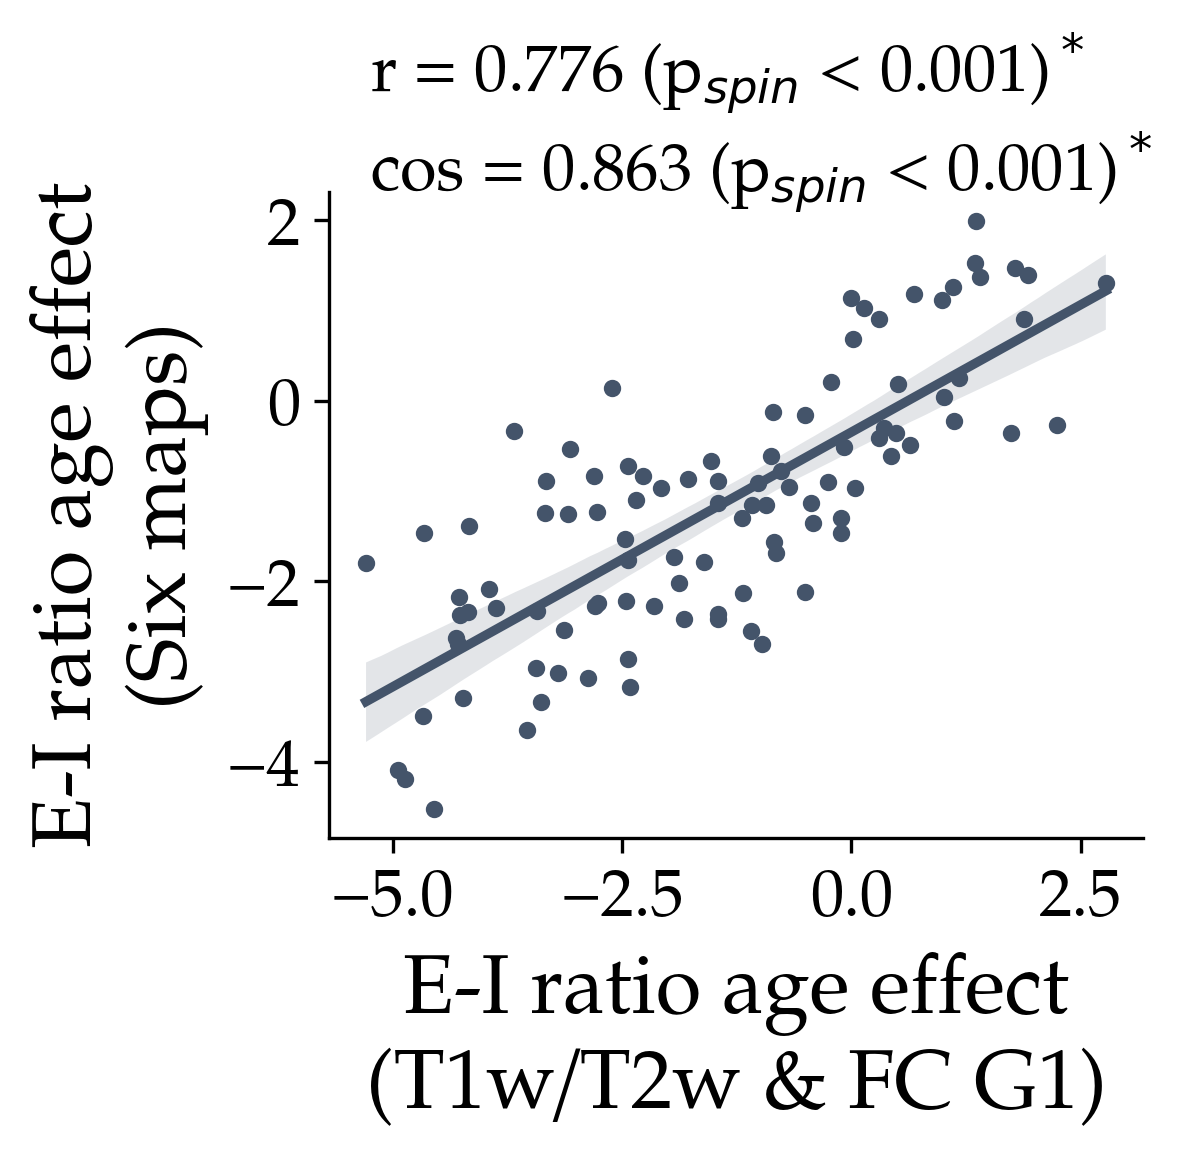

In [5]:
plot.reg_plot(
    all_stats['2maps'][['t']], all_stats['main'][['t']], 'schaefer-100',
    xlabel='E-I ratio age effect''\n(T1w/T2w & FC G1)',
    ylabel='E-I ratio age effect''\n(Six maps)'
)

### (iii) ICC

       younger    older      all
count  100.000  100.000  100.000
mean     0.671    0.692    0.698
std      0.109    0.150    0.108
min      0.321    0.004    0.183
25%      0.602    0.626    0.627
50%      0.684    0.713    0.715
75%      0.751    0.785    0.775
max      0.867    0.922    0.881
T =-1.464569790397286, p = 0.14620673990105335


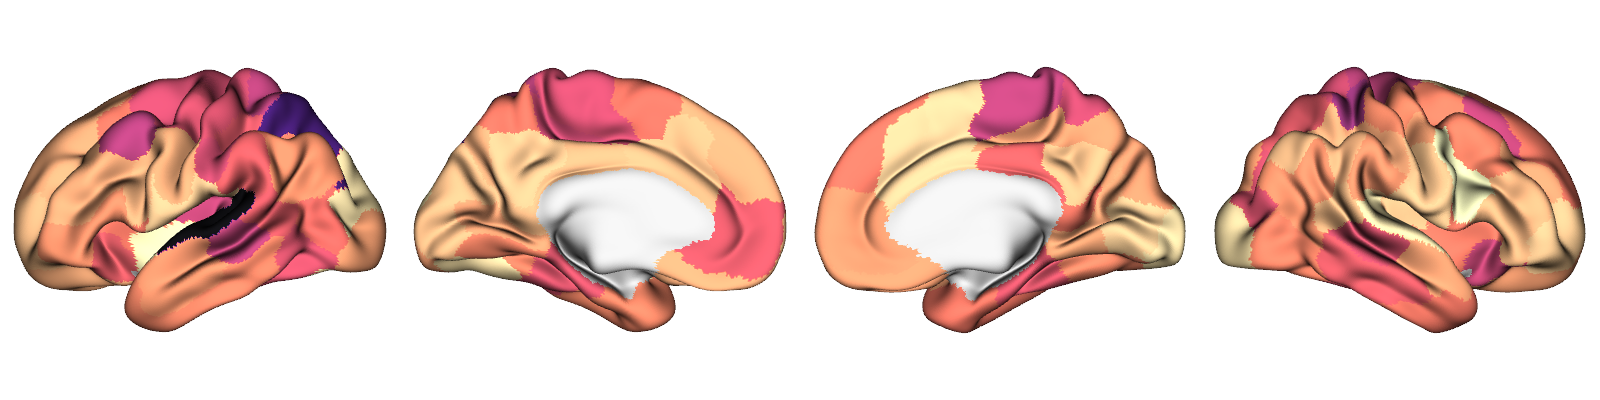

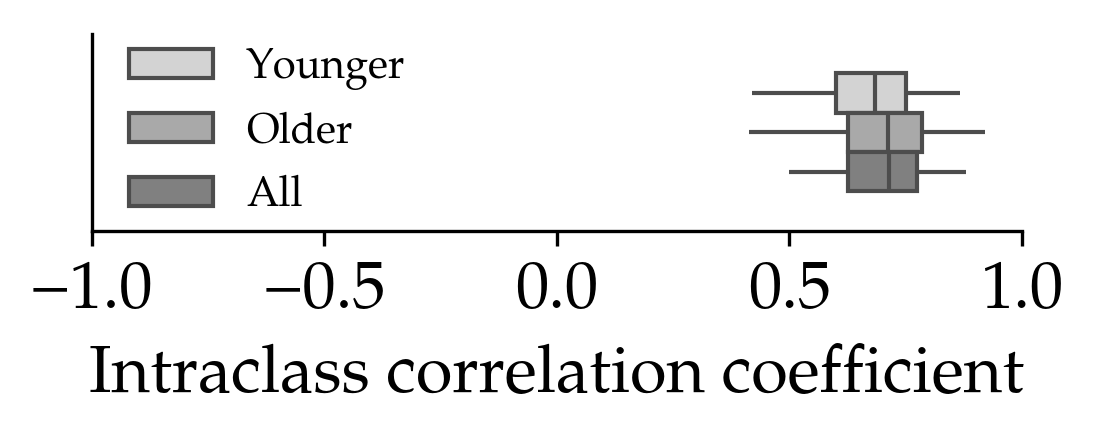

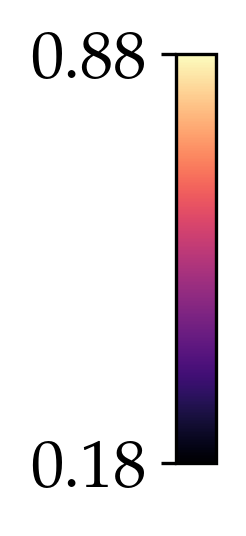

In [6]:
print(all_ICCs_by_age['2maps'].describe().round(3))
plot.plot_icc_by_age(all_ICCs_by_age['2maps'], 'schaefer-100')

## B. Effect of age on E-I ratio using NMDA & GABA$_{A/BZ}$

### (i) FDR-significant effects

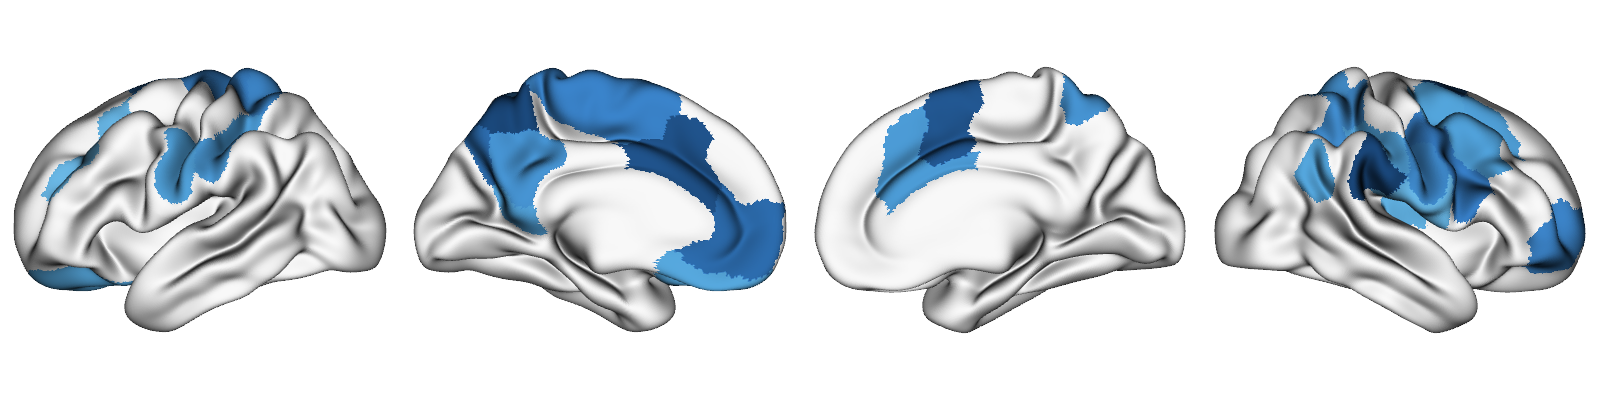

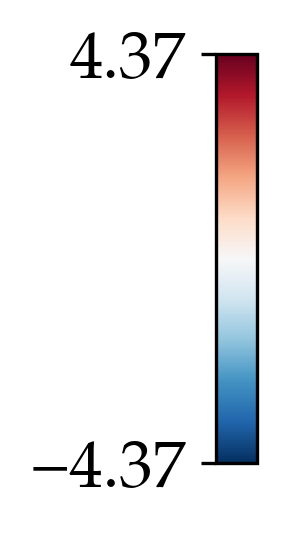

In [7]:
vmin = min(all_stats['nmda_gabaa']['t'].values.min(), -all_stats['nmda_gabaa']['t'].values.max()).round(2)
vmax = -vmin
plot.plot_surface(
    transform.deparcellate_surf(
        all_stats['nmda_gabaa']['t'][all_stats['nmda_gabaa']['p_fdr']<0.05], 
        'schaefer-100', concat=True, space='fsaverage'
    ), 
    'fsaverage', mesh_kind='semi-inflated',
    vrange=(vmin, vmax), cmap='RdBu_r', cbar=True, 
    cbar_kwargs=dict(figsize=(2,2)),
    layout_style='row',
)

### (ii) Comparison with main age effect map

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Correlation coefficient: 0.3305193753287287 ; p-vlaue: 0.001
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Cosine similarity: 0.6303135241683572 ; p-vlaue: 0.0


<Axes: xlabel='E-I ratio age effect\n(NMDA & GABA$_{A/BZ}$)', ylabel='E-I ratio age effect\n(Six maps)'>

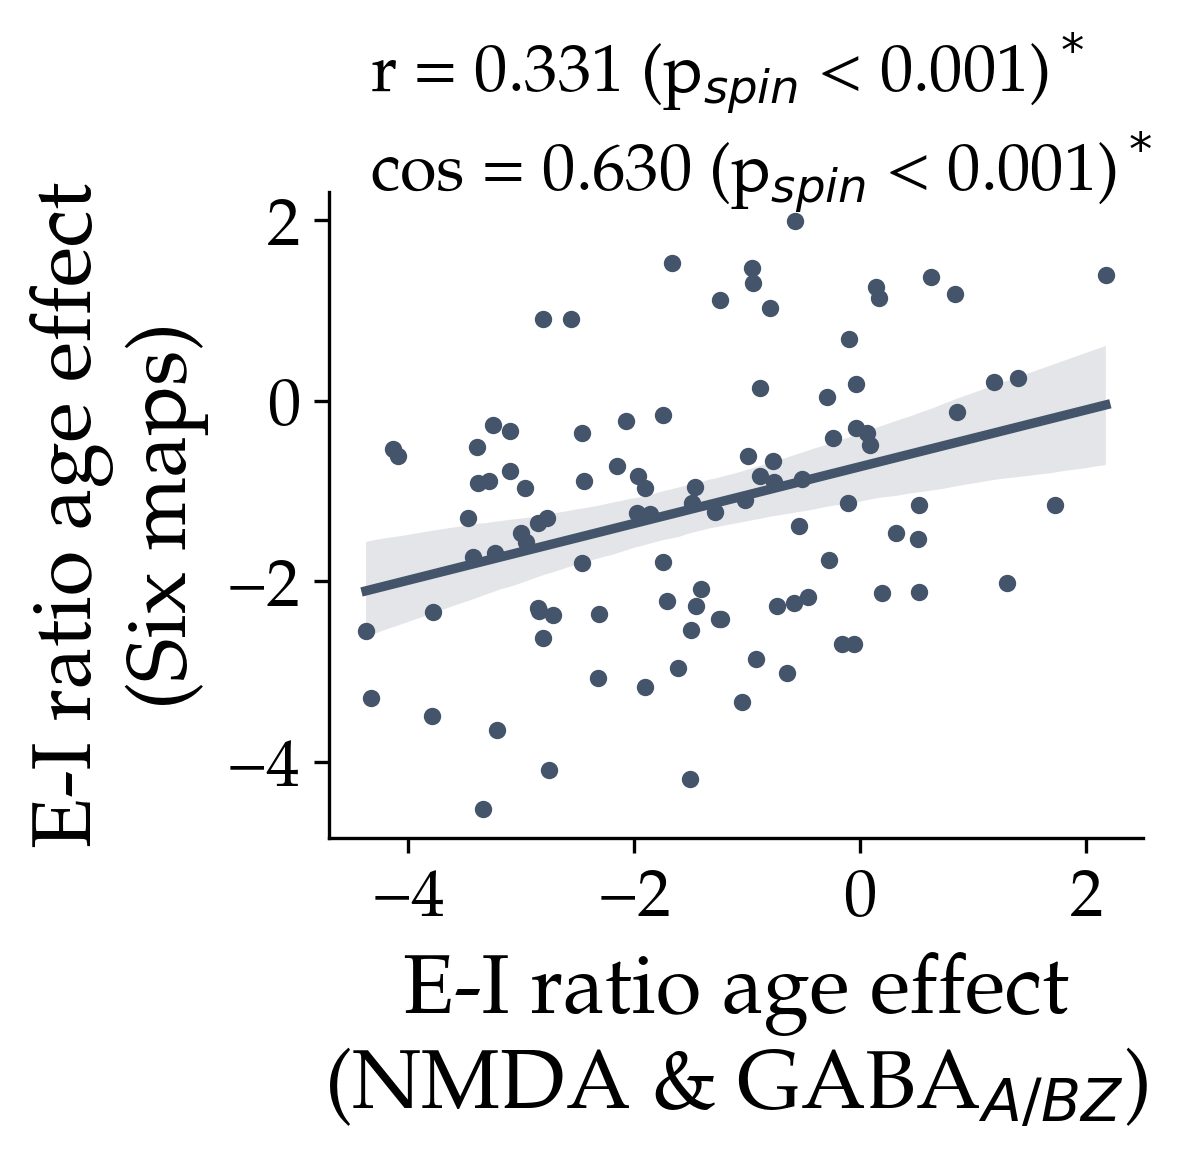

In [8]:
plot.reg_plot(
    all_stats['nmda_gabaa'][['t']], all_stats['main'][['t']], 'schaefer-100',
    xlabel='E-I ratio age effect''\n(NMDA & GABA$_{A/BZ}$)',
    ylabel='E-I ratio age effect''\n(Six maps)'
)

### (iii) ICC

       younger    older      all
count  100.000  100.000  100.000
mean     0.469    0.547    0.530
std      0.166    0.160    0.133
min      0.035    0.174    0.203
25%      0.359    0.433    0.434
50%      0.489    0.573    0.549
75%      0.602    0.665    0.619
max      0.765    0.838    0.795
T =-4.96866778900055, p = 2.8243198008038292e-06


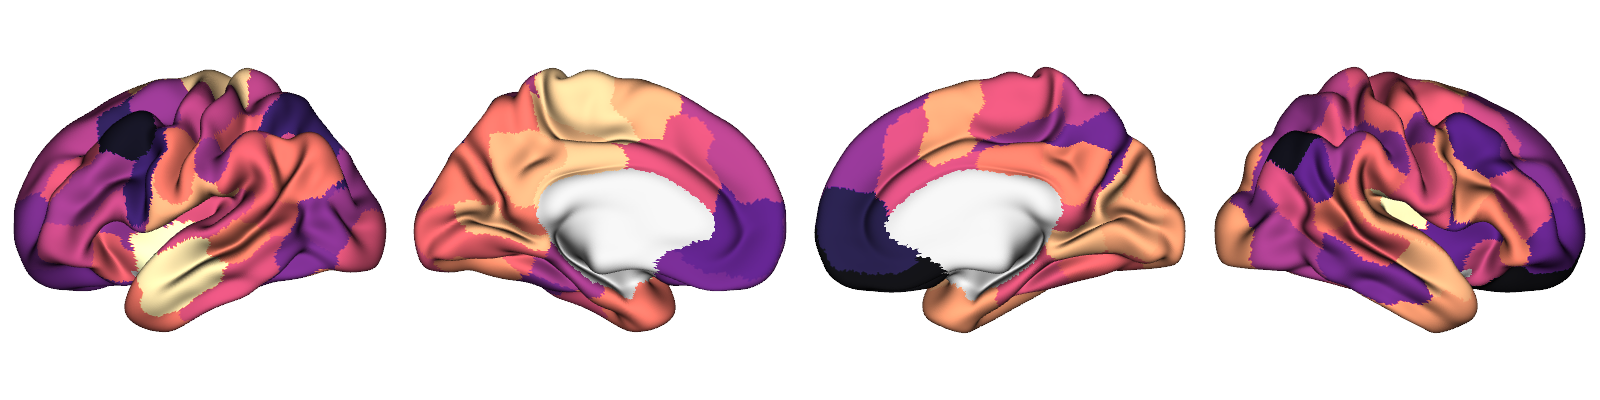

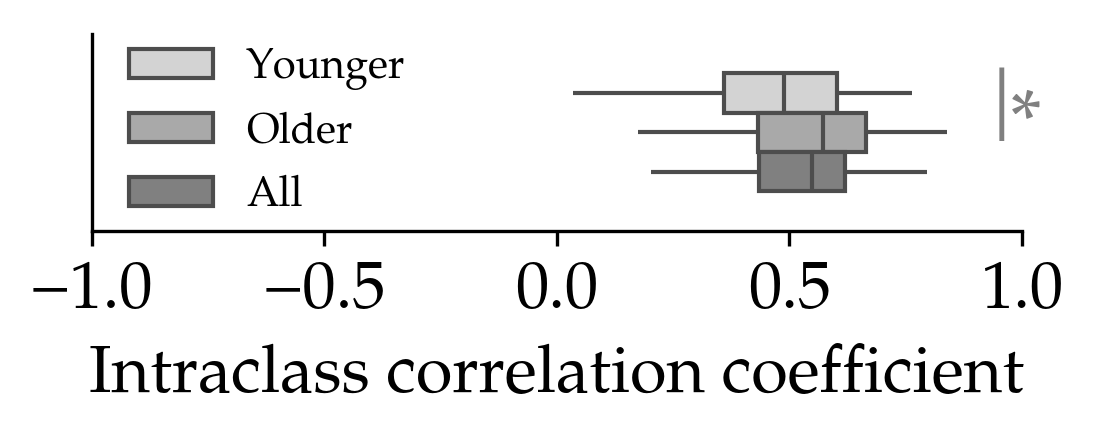

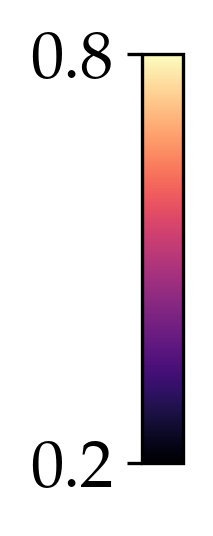

In [9]:
print(all_ICCs_by_age['nmda_gabaa'].describe().round(3))
plot.plot_icc_by_age(all_ICCs_by_age['nmda_gabaa'], 'schaefer-100')

## C. Effect of age on E-I ratio using T1w/T2w, FC G1, NMDA & GABA$_{A/BZ}$

### (i) FDR-significant effects

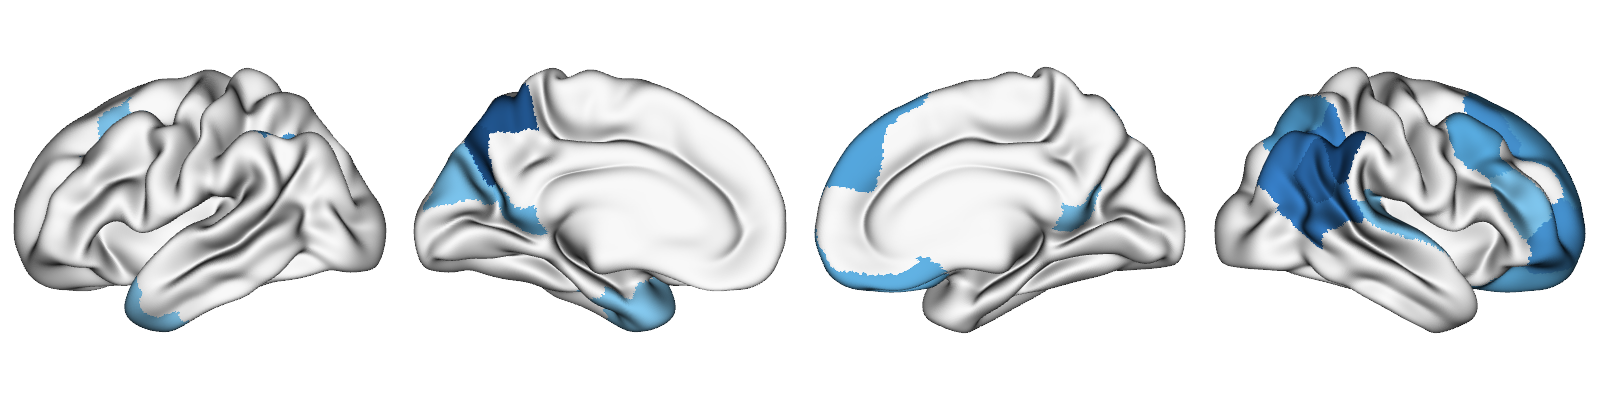

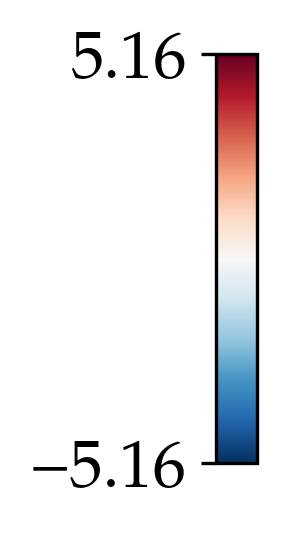

In [10]:
vmin = min(all_stats['4maps']['t'].values.min(), -all_stats['4maps']['t'].values.max()).round(2)
vmax = -vmin
plot.plot_surface(
    transform.deparcellate_surf(
        all_stats['4maps']['t'][all_stats['4maps']['p_fdr']<0.05], 
        'schaefer-100', concat=True, space='fsaverage'
    ), 
    'fsaverage', mesh_kind='semi-inflated',
    vrange=(vmin, vmax), cmap='RdBu_r', cbar=True, 
    cbar_kwargs=dict(figsize=(2,2)),
    layout_style='row',
)

### (ii) Comparison with main age effect map

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Correlation coefficient: 0.8534980001933581 ; p-vlaue: 0.0
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Cosine similarity: 0.9156989396323226 ; p-vlaue: 0.0


<Axes: xlabel='E-I ratio age effect\n(Four maps)', ylabel='E-I ratio age effect\n(Six maps)'>

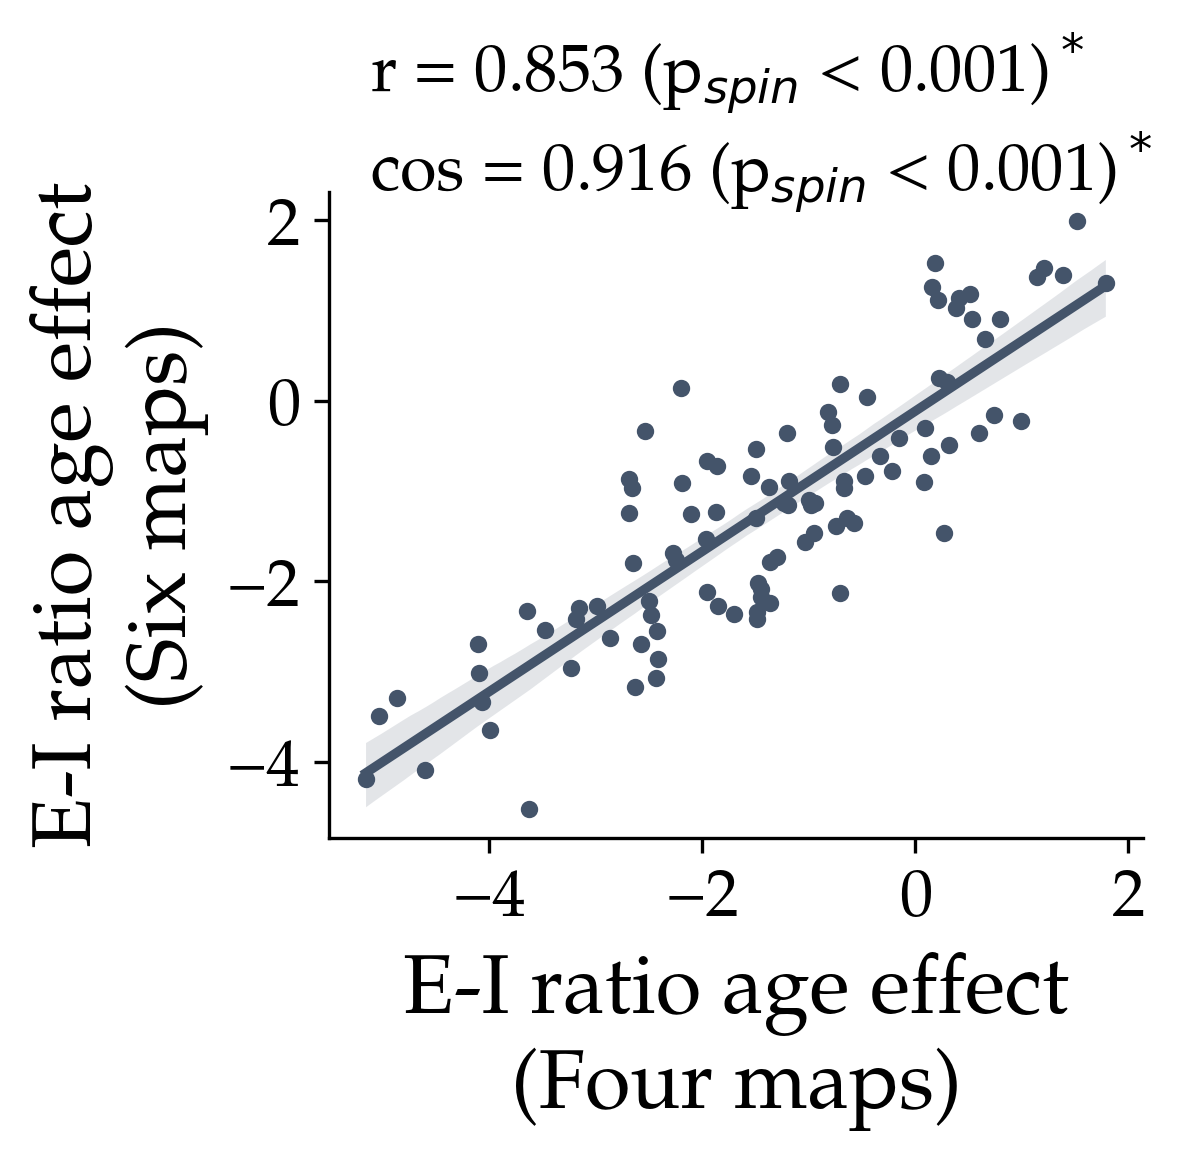

In [11]:
plot.reg_plot(
    all_stats['4maps'][['t']], all_stats['main'][['t']], 'schaefer-100',
    xlabel='E-I ratio age effect''\n(Four maps)',
    ylabel='E-I ratio age effect''\n(Six maps)'
)

### (iii) ICC

       younger    older      all
count  100.000  100.000  100.000
mean     0.786    0.828    0.819
std      0.076    0.092    0.068
min      0.573    0.260    0.483
25%      0.745    0.798    0.788
50%      0.799    0.844    0.830
75%      0.834    0.880    0.866
max      0.942    0.946    0.931
T =-4.651579530078343, p = 1.0207695995791003e-05


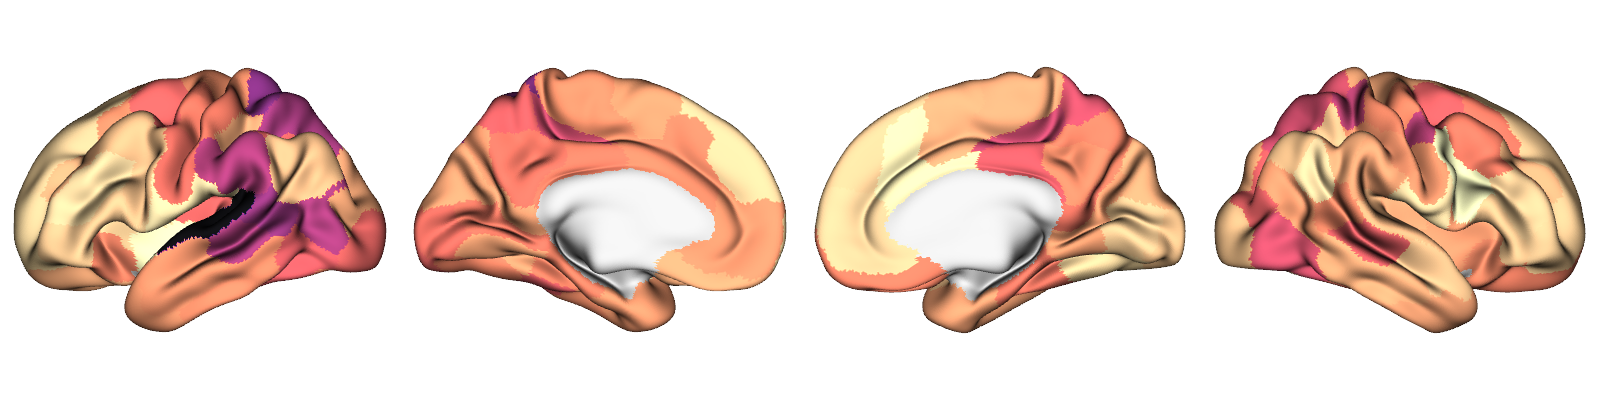

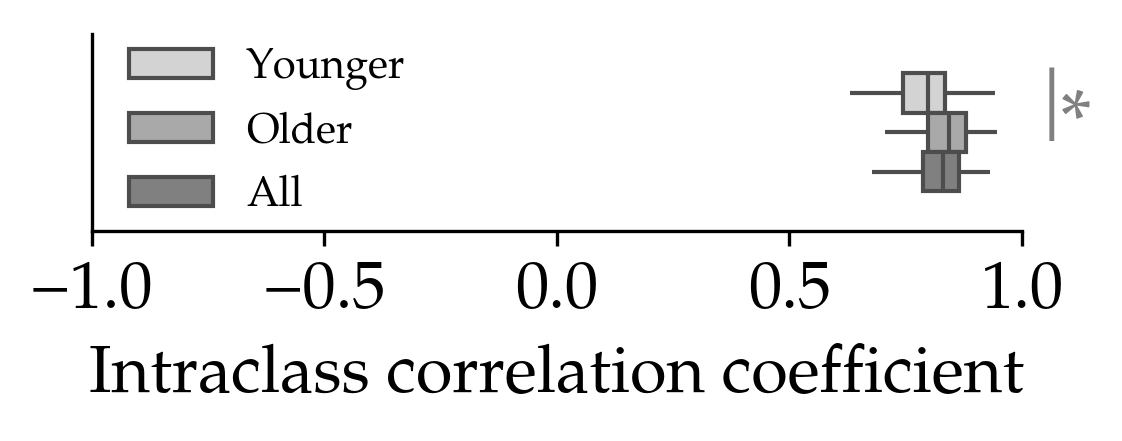

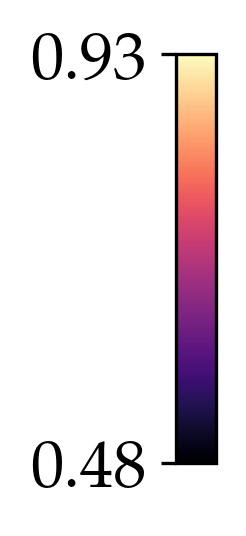

In [12]:
print(all_ICCs_by_age['4maps'].describe().round(3))
plot.plot_icc_by_age(all_ICCs_by_age['4maps'], 'schaefer-100')

## D. Comparison of GOF using alternative subsets of heterogeneity maps

In [14]:
gof_labels = {    
    'gof': 'Goodness-of-fit',
    'fc_corr': 'FC correlation',
    'sc_fc': 'SC-FC coupling',
    'fc_diff': 'FC difference',
    'fcd_ks': 'FCD KS distance',
}

Goodness-of-fit: 4maps - main: t = -10.416, p = 0.0, mean_diff = -0.018, sd_diff = 0.024
Goodness-of-fit: 2maps - main: t = -17.998, p = 0.0, mean_diff = -0.044, sd_diff = 0.034
Goodness-of-fit: nmda_gabaa - main: t = -18.259, p = 0.0, mean_diff = -0.068, sd_diff = 0.053
FC correlation: 4maps - main: t = -6.94, p = 0.0, mean_diff = -0.009, sd_diff = 0.019
FC correlation: 2maps - main: t = -11.289, p = 0.0, mean_diff = -0.023, sd_diff = 0.028
FC correlation: nmda_gabaa - main: t = -14.361, p = 0.0, mean_diff = -0.04, sd_diff = 0.039
FC difference: 4maps - main: t = 2.838, p = 0.005, mean_diff = 0.006, sd_diff = 0.029
FC difference: 2maps - main: t = 7.292, p = 0.0, mean_diff = 0.014, sd_diff = 0.026
FC difference: nmda_gabaa - main: t = 9.08, p = 0.0, mean_diff = 0.022, sd_diff = 0.035
FCD KS distance: 4maps - main: t = 1.644, p = 0.102, mean_diff = 0.003, sd_diff = 0.024
FCD KS distance: 2maps - main: t = 5.289, p = 0.0, mean_diff = 0.008, sd_diff = 0.021
FCD KS distance: nmda_gabaa - 

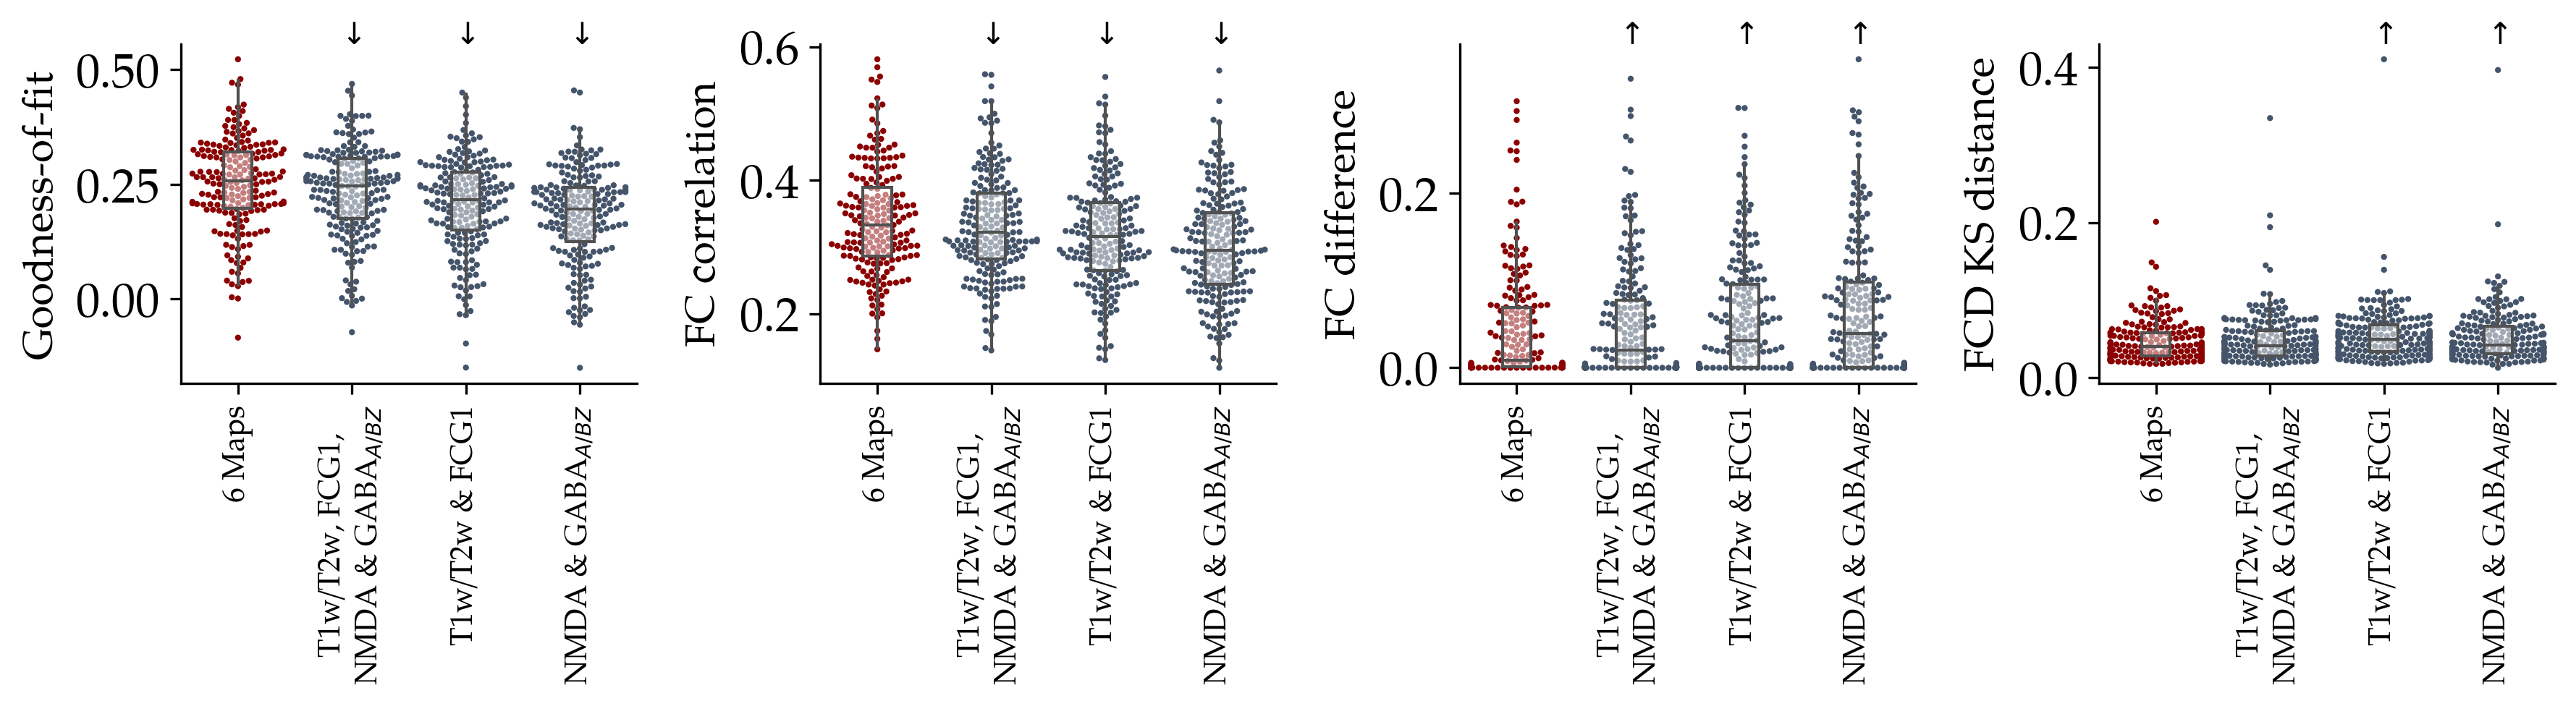

In [15]:
altmaps = ['main', '4maps', '2maps', 'nmda_gabaa']
altmap_labels = ['6 Maps', 'T1w/T2w, FCG1,\nNMDA & GABA$_{A/BZ}$', 'T1w/T2w & FCG1', r'NMDA & GABA$_{A/BZ}$']
data_het_combined = []
for alt in altmaps:
    all_data[alt]['Maps'] = alt
    data_het_combined.append(all_data[alt].loc[:, ['gof', 'fc_corr', 'fcd_ks', 'fc_diff', 'Maps']])
data_het_combined = pd.concat(data_het_combined, axis=0)
gof_measures = ['gof','fc_corr', 'fc_diff', 'fcd_ks']
fig, axd = plt.subplot_mosaic(
    [gof_measures],
    gridspec_kw=dict(width_ratios=[1]*4, height_ratios=[1]), 
    figsize=(12, 3.5)
)

for i, col in enumerate(gof_measures):
    label = gof_labels[col]
    ax = axd[col]
    sns.swarmplot(
        data=data_het_combined,
        x='Maps', y=col, order=altmaps,
        s=2, palette=['darkred']+[thcolor]*6,
        ax=ax
    )
    sns.boxplot(
        data=data_het_combined,
        x='Maps', y=col, order=altmaps,
        showfliers=False,
        showcaps=False, width=0.25,
        boxprops={"facecolor": (1, 1, 1, 0.5)},
        ax=ax)
    plt.setp(ax.collections, zorder=0, label="") # puts swarm in the back
    ax.set_ylabel(label, fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(altmap_labels, rotation=90, fontsize=10)
    sns.despine()
    # statistics
    for j, alt in enumerate(altmaps[1:]):
        t, p = scipy.stats.ttest_rel(
            data_het_combined.loc[data_het_combined['Maps']==alt, col],
            data_het_combined.loc[data_het_combined['Maps']=='main', col]
        )
        if p < 0.05:
            text_x = j+0.85
            text_y = ax.get_ylim()[1]
            if t < 0:
                text = r'$\downarrow$'
            else:
                text = r'$\uparrow$'
            # text = '*'
            ax.text(text_x, text_y, text, fontsize=10, multialignment='center')
        mean_diff = (
            data_het_combined.loc[data_het_combined['Maps']==alt, col] - 
            data_het_combined.loc[data_het_combined['Maps']=='main', col]
        ).mean()
        sd_diff = (
            data_het_combined.loc[data_het_combined['Maps']==alt, col] - 
            data_het_combined.loc[data_het_combined['Maps']=='main', col]
        ).std()
        print(f"{label}: {alt} - main: t = {round(t, 3)}, p = {round(p,3)}, mean_diff = {round(mean_diff, 3)}, sd_diff = {round(sd_diff, 3)}")
fig.tight_layout(pad=1.0)